<a href="https://colab.research.google.com/github/Vaibhav-123vas/AWS_Resource-Monitor/blob/main/End_to_End_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/sample_data/placement.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/placement.csv'

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape

(100, 3)

In [ ]:
df=df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [ ]:
import matplotlib.pyplot as plt

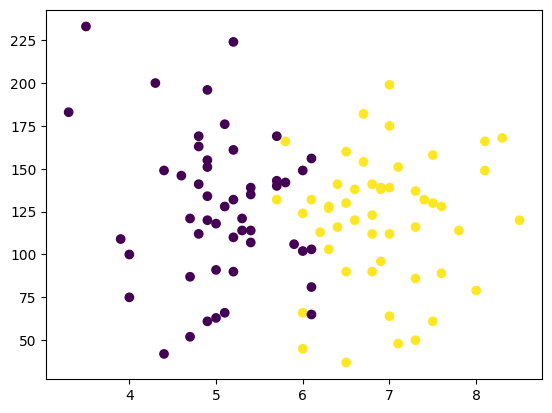

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [ ]:
y.shape #1-d tensor

(100,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [ ]:
X_train

,cgpa,iq
73,4.9,61.0
20,6.6,120.0
61,7.3,137.0
52,7.0,175.0
46,5.3,114.0
...,...,...
69,8.5,120.0
1,5.9,106.0
15,5.1,176.0
51,4.8,141.0


In [ ]:
y_train

73    0
20    1
61    1
52    1
46    0
     ..
69    1
1     0
15    0
51    0
10    1
Name: placement, Length: 90, dtype: int64

In [ ]:
X_test

,cgpa,iq
72,7.3,116.0
70,6.3,127.0
67,5.0,118.0
82,6.5,37.0
56,6.1,65.0
50,3.5,233.0
32,7.0,139.0
83,7.5,130.0
64,7.0,64.0
33,6.0,149.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train

array([[-0.93920855, -1.66064334],
       [ 0.55921594, -0.11090412],
       [ 1.17621425,  0.3356309 ],
       [ 0.9117864 ,  1.33376803],
       [-0.58663808, -0.26850472],
       [ 0.99992902,  0.70336563],
       [ 0.11850285,  0.83469946],
       [ 0.20664547, -0.29477149],
       [-0.58663808, -0.08463736],
       [ 0.3829307 ,  0.44069797],
       [-0.93920855, -0.11090412],
       [-0.6747807 , -0.37357179],
       [-1.02735117,  1.01856683],
       [-0.49849547, -0.45237209],
       [ 0.82364379,  0.36189767],
       [ 0.82364379, -0.74130652],
       [ 2.05764042,  1.14990066],
       [-0.6747807 , -0.89890712],
       [ 1.61692734, -0.26850472],
       [ 0.11850285, -1.13530801],
       [ 0.03036023, -0.58370592],
       [ 0.99992902, -2.0021113 ],
       [-0.49849547,  0.28309737],
       [-0.85106593, -1.60810981],
       [ 0.64735855,  1.51763539],
       [-0.23406762,  0.20429707],
       [-0.93920855,  0.8084327 ],
       [ 1.79321257, -1.18784155],
       [ 0.73550117,

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
X_test

array([[ 1.17621425, -0.21597119],
       [ 0.29478809,  0.07296324],
       [-0.85106593, -0.16343766],
       [ 0.47107332, -2.29104573],
       [ 0.11850285, -1.55557628],
       [-2.17320519,  2.85724048],
       [ 0.9117864 ,  0.38816444],
       [ 1.35249949,  0.15176354],
       [ 0.9117864 , -1.58184304],
       [ 0.03036023,  0.6508321 ]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf=LogisticRegression()

In [ ]:
# Model training
clf.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_test

72    1
70    1
67    0
82    1
56    0
50    0
32    1
83    1
64    1
33    0
Name: placement, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.8

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

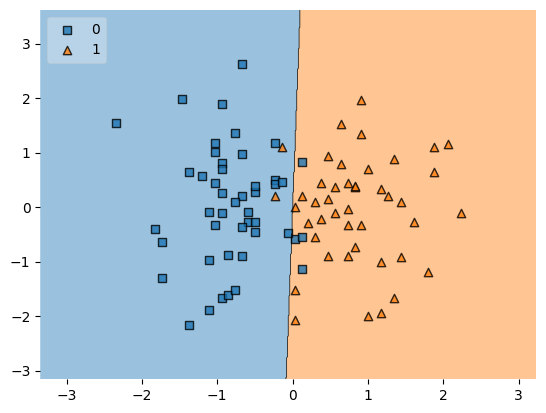

In [ ]:
plot_decision_regions(X_train,y_train.values, clf=clf, legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))